In [1]:
import pandas as pd
train_class=pd.read_csv('mnist-train-labels.csv',header=None,names=['class','file'])
train_class.head()



,class,file
0,5,00001.tif
1,0,00002.tif
2,4,00003.tif
3,1,00004.tif
4,9,00005.tif


In [2]:
test_class=pd.read_csv('mnist-test-labels.csv',header=None,names=['class','file'])
test_class.head()

,class,file
0,7,00001.tif
1,2,00002.tif
2,1,00003.tif
3,0,00004.tif
4,4,00005.tif


In [8]:
from os import listdir
from skimage import io
imagedir='mnist-train-images-tiff/mnist-train-images-tiff/'
files=listdir(imagedir)
import numpy as np
#creating numpy matrix/tensor to store the images
x_train = np.empty(shape=(len(files),28,28),dtype=np.int)
#creating numpy matrix to store class labels
y_train_original = np.empty(shape=(len(files)),dtype=np.int)
for i in range(0,len(files)):
    if(i%2000 == 0):
        print('done processing ' + str(i) + ' images')
    I = io.imread(imagedir+files[i])
    x_train[i,:,:] = I
    y_train_original[i] = train_class.loc[train_class['file'] == files[i],'class'].item()

C:\Users\KritikaSingh\AppData\Local\Temp\ipykernel_22348\1548690282.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_train = np.empty(shape=(len(files),28,28),dtype=np.int)
C:\Users\KritikaSingh\AppData\Local\Temp\ipykernel_22348\1548690282.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your

done processing 0 images
done processing 2000 images
done processing 4000 images
done processing 6000 images
done processing 8000 images
done processing 10000 images
done processing 12000 images
done processing 14000 images
done processing 16000 images
done processing 18000 images
done processing 20000 images
done processing 22000 images
done processing 24000 images
done processing 26000 images
done processing 28000 images
done processing 30000 images
done processing 32000 images
done processing 34000 images
done processing 36000 images
done processing 38000 images
done processing 40000 images
done processing 42000 images
done processing 44000 images
done processing 46000 images
done processing 48000 images
done processing 50000 images
done processing 52000 images
done processing 54000 images
done processing 56000 images
done processing 58000 images


In [9]:
from os import listdir
imagedir='mnist-test-images-tiff/mnist-test-images-tiff/'
files=listdir(imagedir)
import numpy as np
#creating numpy matrix/tensor to store the images
x_test = np.empty(shape=(len(files),28,28),dtype=np.int)
#creating numpy matrix to store class labels
y_test_original = np.empty(shape=(len(files)),dtype=np.int)
for i in range(0,len(files)):
    if(i%2000 == 0):
        print('done processing ' + str(i) + ' images')
    I = io.imread(imagedir+files[i])
    x_test[i,:,:] = I
    y_test_original[i] = test_class.loc[test_class['file'] == files[i],'class'].item()

C:\Users\KritikaSingh\AppData\Local\Temp\ipykernel_22348\1050968376.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = np.empty(shape=(len(files),28,28),dtype=np.int)
C:\Users\KritikaSingh\AppData\Local\Temp\ipykernel_22348\1050968376.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your 

done processing 0 images
done processing 2000 images
done processing 4000 images
done processing 6000 images
done processing 8000 images


In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train_original.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


In [11]:
import h5py
hf = h5py.File("mnist_data.h5", 'w')
hf.create_dataset('x_train', data=x_train)
hf.create_dataset('y_train', data=y_train_original)
hf.create_dataset('x_test', data=x_test)
hf.create_dataset('y_test', data=y_test_original)
hf.close()

In [12]:
f1 = h5py.File("mnist_data.h5","r")
f1.keys()

<KeysViewHDF5 ['x_test', 'x_train', 'y_test', 'y_train']>

In [13]:
x_train = np.array(f1['x_train'])
x_test = np.array(f1['x_test'])
y_train_original = np.array(f1['y_train'])
y_test_original = np.array(f1['y_test'])

print(x_train.shape)
print(x_test.shape)
print(y_train_original.shape)
print(y_test_original.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [14]:
x_train1=np.reshape(x_train,(60000,28*28))
x_test1=np.reshape(x_test,(10000,28*28))
print(x_train1.shape)
print(x_test1.shape)

(60000, 784)
(10000, 784)


In [16]:
np.savetxt('mnist_training.csv', x_train1, fmt='%d', delimiter=',') 
np.savetxt('mnist_testing.csv', x_test1, fmt='%d', delimiter=',') 
np.savetxt('mnist_training_class.csv', y_train_original, fmt='%d', delimiter=',') 
np.savetxt('mnist_testing_class.csv', y_test_original, fmt='%d', delimiter=',') 

In [17]:
x_train1 = x_train1/255
x_test1 = x_test1/255
print(np.max(x_train1))
print(np.max(x_test1))
print(np.min(x_train1))
print(np.min(x_test1))

1.0
1.0
0.0
0.0


In [18]:
from keras.utils import np_utils
NB_CLASSES = 10 #number of classes
print('shape of y_train and y_test before categorical')
print(y_train_original.shape)
print(y_test_original.shape)
y_train= np_utils.to_categorical(y_train_original, NB_CLASSES)
y_test= np_utils.to_categorical(y_test_original, NB_CLASSES)
y_train = y_train.astype(int)
y_test = y_test.astype(int)
print('shape of y_train and y_test after categorical')
print(y_train.shape)
print(y_test.shape)

shape of y_train and y_test before categorical
(60000,)
(10000,)
shape of y_train and y_test after categorical
(60000, 10)
(10000, 10)


In [19]:
print(y_train_original[0])
print(y_train[0,:])

5
[0 0 0 0 0 1 0 0 0 0]


In [20]:
from tensorflow.keras.models import Sequential # what kind of model ? a sequenctial model
from tensorflow.keras.layers import Dense, Activation # different layers, activation function, and dropout
from tensorflow.keras.optimizers import SGD # optimization algorithm

In [21]:
NB_EPOCH = 150 # number of epoch
BATCH_SIZE = 30 # mini batch size
VERBOSE = 1 #display results during training
NB_CLASSES = 10 #number of classes
OPTIMIZER = SGD() # choose optimizer
N_HIDDEN = 50 # number of nodes in the hidden layer
VALIDATION_SPLIT = 0.2 #80% training and 20%validation
METRICS =['accuracy']
LOSS = 'categorical_crossentropy' 

In [29]:
model = Sequential()
model.add(Dense(N_HIDDEN,input_shape=(x_train1.shape[1],),activation='relu'))
model.add(Dense(N_HIDDEN,activation='relu'))
model.add(Dense(NB_CLASSES,activation='softmax'))
print(model.summary())  


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                39250     
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
NB_EPOCH = 500
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience = 6)

from keras.callbacks import ModelCheckpoint
filepath="best_model_mnist.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True)
model.compile(loss=LOSS, optimizer = SGD(), metrics =METRICS)
Tuning_early_Stopping = model.fit(x_train1,y_train,batch_size=BATCH_SIZE, epochs = NB_EPOCH, verbose = VERBOSE,
                                validation_split = VALIDATION_SPLIT,callbacks=[checkpoint,early_stopping_monitor])

Epoch 1/500
1585/1600 [============================>.] - ETA: 0s - loss: 0.7961 - accuracy: 0.7637
Epoch 1: val_loss improved from inf to 0.54700, saving model to best_model_mnist.hdf5
1600/1600 [==============================] - 6s 3ms/step - loss: 0.7937 - accuracy: 0.7643 - val_loss: 0.5470 - val_accuracy: 0.8250
Epoch 2/500
1588/1600 [============================>.] - ETA: 0s - loss: 0.4052 - accuracy: 0.8791
Epoch 2: val_loss improved from 0.54700 to 0.35478, saving model to best_model_mnist.hdf5
1600/1600 [==============================] - 4s 3ms/step - loss: 0.4049 - accuracy: 0.8791 - val_loss: 0.3548 - val_accuracy: 0.8907
Epoch 3/500
1590/1600 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.8957
Epoch 3: val_loss improved from 0.35478 to 0.28479, saving model to best_model_mnist.hdf5
1600/1600 [==============================] - 4s 3ms/step - loss: 0.3486 - accuracy: 0.8958 - val_loss: 0.2848 - val_accuracy: 0.9175
Epoch 4/500
1589/1600 [===============

In [25]:
import matplotlib
import matplotlib.pyplot as plt
def plotHistory(Tuning):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(Tuning.history['loss'])
    axs[0].plot(Tuning.history['val_loss'])
    axs[0].set_title('loss vs epoch')
    axs[0].set_ylabel('loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend(['train', 'vali'], loc='upper left')
    
    axs[1].plot(Tuning.history['accuracy']) 
    axs[1].plot(Tuning.history['val_accuracy'])
    axs[1].set_title('accuracy vs epoch')
    axs[1].set_ylabel('accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend(['train', 'vali'], loc='upper left')
    plt.show(block = False)
    plt.show()

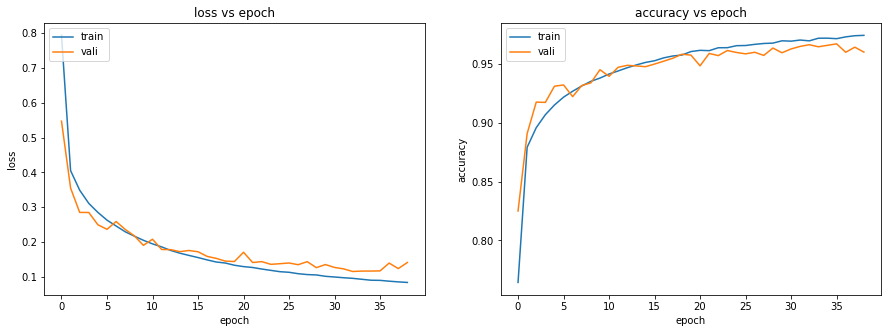

In [26]:
plotHistory(Tuning_early_Stopping )

In [27]:
from keras.models import load_model
filepath='best_model_mnist.hdf5'
finalModel = load_model(filepath)
pred_p = model.predict(x_test1) # predict probabilities
print('Dimensions of pred_p ',pred_p.shape)
print('predicted probabilities of first 5 \n',pred_p[0:5])

313/313 [==============================] - 1s 2ms/step
Dimensions of pred_p  (10000, 10)
predicted probabilities of first 5 
 [[1.7751611e-07 1.1449536e-07 2.3872875e-05 5.1432955e-03 6.7770767e-13
  5.9879902e-08 3.7296714e-14 9.9482661e-01 2.6711299e-07 5.7155412e-06]
 [3.0669712e-06 4.9091788e-04 9.9948066e-01 2.3615257e-05 5.1095489e-10
  3.2151555e-09 8.6322338e-08 4.0138085e-07 1.1825726e-06 6.7461321e-11]
 [1.2911515e-07 9.9395591e-01 3.2296192e-04 2.0426016e-03 2.0849671e-05
  2.4519939e-05 1.5127957e-06 2.4295391e-03 7.3421508e-04 4.6787263e-04]
 [9.9936062e-01 2.1272529e-06 3.6962313e-04 5.8755677e-06 3.3907767e-08
  5.8234120e-05 2.9526705e-05 9.1827724e-06 1.5703012e-06 1.6334173e-04]
 [7.0411079e-07 2.9576766e-08 1.7127786e-05 1.6181812e-07 9.9202514e-01
  1.0042961e-06 3.6110323e-06 1.6717298e-04 1.6661583e-05 7.7684294e-03]]


In [28]:
from sklearn.metrics import accuracy_score
#convert categorical to integer class labels
pred_p = model.predict(x_test1) # predict probabilities
pred_classes = np.argmax(pred_p , axis=1)
y_classes = np.argmax(y_test, axis=1) # returns the index (location) of maximum entry.
print(pred_classes)
print(y_classes)
print(pred_classes.shape)
print(y_classes.shape)
print('testing accuracy',accuracy_score(y_classes,pred_classes))

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
(10000,)
(10000,)
testing accuracy 0.9599
